# Introduction

On utilise comme domaine un ensemble de gaussiennes qui forment des creux et des montagnes.  
Les tourbillons vont suivre les isolignes de ce domaine.

# Import

In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

# Variable

In [2]:
N = 2000 #nombre de tourbillons dans le catalogue
obs = 100 #nombre de tourbillons à prédire
N_pred = 20 #nombre de pas de temps sur lequel on va prédire
nb_voisin = 100 #le nombre de voisins choisis
methods = [locally_constant_mean, locally_incremental_mean, locally_linear_mean] #les différentes méthodes possibles
method = methods[0] #la méthode choisie pour travailler 
k = np.random.randint(0,obs) #numéro du tourbillon que l'on va étudier

# Génération playground

In [3]:
list_mean, list_covMat, X, Y, Z = playground()
catalogue = generer_catalogue(N, list_mean, list_covMat)
observations = generer_catalogue(obs, list_mean, list_covMat)[:,0,:]

Text(0.5, 1.0, 'playground')

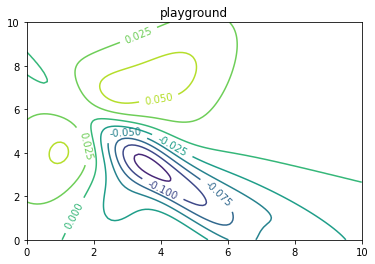

In [4]:
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
CS = ax.contour(X, Y, Z.T)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('playground')

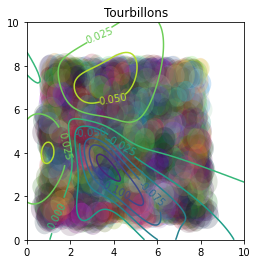

In [5]:
fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
ax.set_ylim(0, 10)
ax.set_xlim(0, 10)
colors = np.random.rand(N,3)
CS = ax.contour(X, Y, Z.T)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Tourbillons')
for i in range(N):
    tourbillon1 = plot_tourbillon(catalogue[i,0,:5])
    tourbillon2 = plot_tourbillon(catalogue[i,0,5:])
    ax.add_artist(tourbillon1)
    ax.add_artist(tourbillon2)
    color = colors[i]
    tourbillon1.set_facecolor(color)
    tourbillon2.set_facecolor(color*0.5)

# Prediction

In [7]:
true_values = list_true_value(catalogue, list_mean, list_covMat, N_pred, observations)
predictions = list_prediction(catalogue, N_pred, observations, method, nb_voisin)

On a donc généré pour les observations leurs véritable comportement (list_true_value) sur N_pred pas de temps à partir du playground.  
On a également généré les prédictions de notre méthode par rapport au catalogue original (predictions) selon la méthode choisie et le nombre de voisins

(0.0, 10.0)

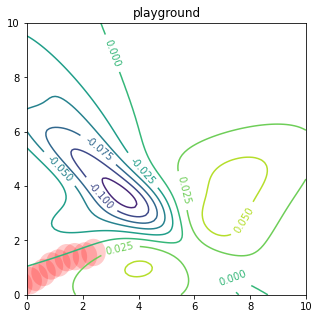

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
ax = plot_trajectory(true_values[k], ax)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('playground')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

On voit que le tourbillon suit bien les isolignes

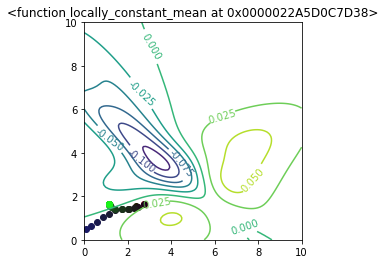

In [12]:
fig = plt.figure(0)
ax1 = fig.add_subplot(111, aspect='equal')
ax1.set_ylim(0, 10)
ax1.set_xlim(0, 10)
ax1.set_title(method)

CS = ax1.contour(X, Y, Z)
ax1.clabel(CS, inline=1, fontsize=10)
ax1.scatter(predictions[k,0,:5][0],predictions[k,0,:5][1],c=np.array([1,0.1,0]).reshape(1,-1))
ax1.scatter(predictions[k,0,5:][0],predictions[k,0,5:][1],c=np.array([1,0.1,0.]).reshape(1,-1))
pred = true_values[k]
true = predictions[k]
i = 0
for mean in pred:
    ax1.scatter(mean[0],mean[1],c = np.array([0.1,0.1,i/len(pred)]).reshape(1,-1))
    i+=1
i = 0
for mean in true:
    ax1.scatter(mean[0],mean[1],c = np.array([0.1,i/len(pred),0.1]).reshape(1,-1))
    i+=1

En bleu ce sont les prédictions et en vert ce sont les vrais valeurs. Plus la prédiction est lointaine plus la couleur est claire.

# Calcul du RMSE

Text(0.5, 0, 'Temps')

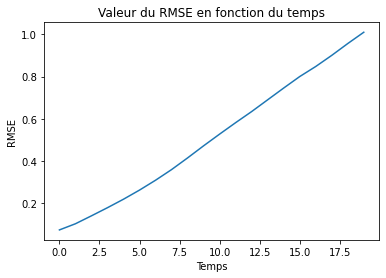

In [13]:
rmse = np.mean(AnDA_RMSE(predictions[:,:,5:],true_values),axis = 0)
plt.plot(rmse)
plt.title('Valeur du RMSE en fonction du temps')
plt.ylabel('RMSE')
plt.xlabel('Temps')

In [14]:
print(f'Valeur du RMSE à la prédicion 8: {rmse[8]:.2f}')

Valeur du RMSE à la prédicion 8: 0.42
